In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('/content/drive/My Drive/38891_59255/cleaned_dataset_train.csv')

In [3]:
df.isna().sum()

Unnamed: 0      0
label           0
tweet           0
clean_tweet    11
Hashtags        0
dtype: int64

In [4]:
df['clean_tweet'].fillna('Null',inplace=True)

In [5]:
df.isna().sum()

Unnamed: 0     0
label          0
tweet          0
clean_tweet    0
Hashtags       0
dtype: int64

In [6]:
df

,Unnamed: 0,label,tweet,clean_tweet,Hashtags
0,0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,bihday majesti,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model love take time urd+-!!! dddd d|d|d|,#model
4,4,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation
...,...,...,...,...,...
29525,31956,0,off fishing tomorrow @user carnt wait first ti...,fish tomorrow carnt wait first time year,No hashtags
29526,31957,0,ate @user isz that youuu?ðððððð...,"ate isz youuu?ddddddddda$?i,",No hashtags
29527,31958,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...,#shame #imwithher
29528,31959,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad,No hashtags


In [7]:
df.drop(['Unnamed: 0','tweet'], axis = 1,inplace=True)

In [8]:
df.head()

,label,clean_tweet,Hashtags
0,0,father dysfunct selfish drag kid dysfunction. ...,#run
1,0,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,0,bihday majesti,No hashtags
3,0,#model love take time urd+-!!! dddd d|d|d|,#model
4,0,factsguide: societi #motiv,#motivation


In [9]:
X_temp, X_test, y_temp, y_test = train_test_split(df.drop(['label'],axis=1), pd.DataFrame(df['label']), test_size=0.1, stratify=df['label'])

In [10]:
X_test.shape, X_temp.shape, y_test.shape, y_temp.shape

((2953, 2), (26577, 2), (2953, 1), (26577, 1))

In [11]:
X_temp['label'] = y_temp

In [12]:
X_temp.head()

,clean_tweet,Hashtags,label
15070,n #healthi pain feel today strength feel tomor...,#healthy,0
9541,i'm happi clap along feel like happi truth ......,#pharrellwilliams,0
2962,enjoy sunshine#sunshin,No hashtags,0
5789,advice: alway listen voic head. may alway righ...,No hashtags,0
18970,"jams+blanket=a good ride conceda$?i, #can'twait",#can'twait,0


In [13]:
nonhate = X_temp[X_temp['label'] == 0]

In [14]:
nonhate.shape[0]

24765

In [15]:
hate = X_temp[X_temp.label == 1]

In [16]:
hate.shape[0]

1812

In [17]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [18]:
nonhatesample.shape

(1812, 3)

In [19]:
X_train = pd.concat([hate, nonhatesample], axis = 0)
y_train = X_train['label']
X_train.drop('label',axis=1,inplace=True)

In [20]:
X_train.head()

,clean_tweet,Hashtags
2997,"""the holiday violent time me, iav begun questi...",#chria|
10030,"""most boy use drill..."" really? :-)",No hashtags
4906,think w share guarani aquif water w humili lit...,No hashtags
8458,#trump guilti treason ! #theresist must #resis...,#trump #theresistance #resist #hate
8209,"express , #misandry, #misogyni (ie #power) pa ...","#misandry, #misogyny #power)"


In [21]:
X_train.shape

(3624, 2)

In [22]:
def make_corpus(df):
  corpus = []
  for i in df:
    corpus.append(i)
  
  return corpus

### Creating Bag Of Words

In [66]:
# for training data
vectorizer_train = CountVectorizer(max_features=1000)
vocabulary_train = vectorizer_train.fit_transform(make_corpus(X_train['clean_tweet']))
bow_train = vocabulary_train.toarray()

# for testing data
vectorizer_test = CountVectorizer(max_features=1000)
vocabulary_test = vectorizer_test.fit_transform(make_corpus(X_test['clean_tweet']))
bow_test = vocabulary_test.toarray()

### Creating TF-IDF 

In [67]:
#for training data
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(make_corpus(X_train.clean_tweet))
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
tfdf_train = pd.DataFrame(denselist1, columns=feature_names1)

#for testing data
vectorizer2 = TfidfVectorizer(max_features=1000)
X2 = vectorizer2.fit_transform(make_corpus(X_test.clean_tweet))
feature_names2 = vectorizer2.get_feature_names()
denselist2 = X2.todense().tolist()
tfdf_test = pd.DataFrame(denselist2, columns=feature_names2)


# Building ML models

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns

In [79]:
model = ['LR','RF','DT','KN','GN','GB']
accuracy = {'BOW':[], 'TF-IDF':[]}
recall = {'BOW':[], 'TF-IDF':[]}

### Logistic Regression

In [80]:
#BOW
regressor_LR_bow = LogisticRegression()
regressor_LR_bow.fit(bow_train,y_train)
y_predict_LR_bow = regressor_LR_bow.predict(bow_test)
accuracy['BOW'].append(regressor_LR_bow.score(bow_train,y_train))
recall['BOW'].append(recall_score(y_test, y_predict_LR_bow))

#TF-IDF
regressor_LR_tf = LogisticRegression()
regressor_LR_tf.fit(tfdf_train,y_train)
y_predict_LR_tf = regressor_LR_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(regressor_LR_tf.score(tfdf_train,y_train))
recall['TF-IDF'].append(recall_score(y_test, y_predict_LR_tf))

In [81]:
pd.DataFrame(data=[['BOW',regressor_LR_bow.score(bow_train,y_train),recall_score(y_test, y_predict_LR_bow)],
                   ['TF-IDF',regressor_LR_tf.score(tfdf_train,y_train),recall_score(y_test, y_predict_LR_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.911424,0.502488
1,TF-IDF,0.895695,0.517413


### Random Forest

In [82]:
#BOW
model_RF_bow = RandomForestClassifier()
model_RF_bow.fit(bow_train,y_train)
y_predict_RF_bow = model_RF_bow.predict(bow_test)
accuracy['BOW'].append(model_RF_bow.score(bow_train,y_train))
recall['BOW'].append(recall_score(y_test, y_predict_RF_bow))

#TF-IDF
model_RF_tf = RandomForestClassifier()
model_RF_tf.fit(tfdf_train,y_train)
y_predict_RF_tf = model_RF_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_RF_tf.score(tfdf_train,y_train))
recall['TF-IDF'].append(recall_score(y_test, y_predict_RF_tf))

In [83]:
pd.DataFrame(data=[['BOW',model_RF_bow.score(bow_train,y_train),recall_score(y_test, y_predict_RF_bow)],
                   ['TF-IDF',model_RF_tf.score(tfdf_train,y_train),recall_score(y_test, y_predict_RF_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.990066,0.577114
1,TF-IDF,0.990066,0.487562


### Decision Tree

In [84]:
#BOW
model_DT_bow = DecisionTreeClassifier() 
model_DT_bow.fit(bow_train,y_train)
y_predict_DT_bow = model_DT_bow.predict(bow_test)
accuracy['BOW'].append(model_DT_bow.score(bow_train,y_train))
recall['BOW'].append(recall_score(y_test, y_predict_DT_bow))

#TF-IDF
model_DT_tf = DecisionTreeClassifier() 
model_DT_tf.fit(tfdf_train,y_train)
y_predict_DT_tf = model_DT_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_DT_tf.score(tfdf_train,y_train))
recall['TF-IDF'].append(recall_score(y_test, y_predict_DT_tf))


In [85]:
pd.DataFrame(data=[['BOW',model_DT_bow.score(bow_train,y_train),recall_score(y_test, y_predict_DT_bow)],
                   ['TF-IDF',model_DT_tf.score(tfdf_train,y_train),recall_score(y_test, y_predict_DT_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.990066,0.532338
1,TF-IDF,0.990066,0.452736


### K neighbors

In [86]:
#BOW
model_KN_bow = DecisionTreeClassifier() 
model_KN_bow.fit(bow_train,y_train)
y_predict_KN_bow = model_KN_bow.predict(bow_test)
accuracy['BOW'].append(model_KN_bow.score(bow_train,y_train))
recall['BOW'].append(recall_score(y_test, y_predict_KN_bow))

#TF-IDF
model_KN_tf = DecisionTreeClassifier() 
model_KN_tf.fit(tfdf_train,y_train)
y_predict_KN_tf = model_KN_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_KN_tf.score(tfdf_train,y_train))
recall['TF-IDF'].append(recall_score(y_test, y_predict_KN_tf))

In [87]:
pd.DataFrame(data=[['BOW',model_KN_bow.score(bow_train,y_train),recall_score(y_test, y_predict_KN_bow)],
                   ['TF-IDF',model_KN_tf.score(tfdf_train,y_train),recall_score(y_test, y_predict_KN_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.990066,0.577114
1,TF-IDF,0.990066,0.477612


### GaussianNB

In [88]:
#BOW
model_GN_bow = GaussianNB() 
model_GN_bow.fit(bow_train,y_train)
y_predict_GN_bow = model_GN_bow.predict(bow_test)
accuracy['BOW'].append(model_GN_bow.score(bow_train,y_train))
recall['BOW'].append(recall_score(y_test, y_predict_GN_bow))

#TF-IDF
model_GN_tf = DecisionTreeClassifier() 
model_GN_tf.fit(tfdf_train,y_train)
y_predict_GN_tf = model_GN_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_GN_tf.score(tfdf_train,y_train))
recall['TF-IDF'].append(recall_score(y_test, y_predict_GN_tf))

In [89]:
pd.DataFrame(data=[['BOW',model_GN_bow.score(bow_train,y_train),recall_score(y_test, y_predict_GN_bow)],
                   ['TF-IDF',model_GN_tf.score(tfdf_train,y_train),recall_score(y_test, y_predict_GN_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.822848,0.398010
1,TF-IDF,0.990066,0.472637


### Gradient Boosting

In [94]:
#BOW
model_GB_bow = GradientBoostingClassifier()
model_GB_bow.fit(bow_train,y_train)
y_predict_GB_bow = model_GB_bow.predict(bow_test)
accuracy['BOW'].append(model_GB_bow.score(bow_train,y_train))
recall['BOW'].append(recall_score(y_test, y_predict_GB_bow))

#TF-IDF
model_GB_tf = DecisionTreeClassifier() 
model_GB_tf.fit(tfdf_train,y_train)
y_predict_GB_tf = model_GB_tf.predict(tfdf_test)
accuracy['TF-IDF'].append(model_GB_tf.score(tfdf_train,y_train))
recall['TF-IDF'].append(recall_score(y_test, y_predict_GB_tf))

In [95]:
pd.DataFrame(data=[['BOW',model_GB_bow.score(bow_train,y_train),recall_score(y_test, y_predict_GB_bow)],
                   ['TF-IDF',model_GB_tf.score(tfdf_train,y_train),recall_score(y_test, y_predict_GB_tf)]],
             columns=['','Accuracy','Recall'])

,,Accuracy,Recall
0,BOW,0.806843,0.199005
1,TF-IDF,0.990066,0.467662


# Hyperparameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV, cross_val_score


In [101]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12], 
              "n_estimators": [100, 400]}

In [103]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
hpt = GridSearchCV(rf, param_grid=param_grid)

In [104]:
hpt.fit(tfdf_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=1,
                                   

In [105]:
hpt.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [106]:
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf.fit(bow_train, y_train)
y_predict = rf.predict(bow_test)
recall_score(y_test,y_predict)

0.5621890547263682

# Evaluation


In [96]:
data_bow = {'model':model,'accuracy':accuracy['BOW'],'recall':recall['BOW']}
compare_models_bow = pd.DataFrame(data_bow)
compare_models_bow

,model,accuracy,recall
0,LR,0.911424,0.502488
1,RF,0.990066,0.577114
2,DT,0.990066,0.532338
3,KN,0.990066,0.577114
4,GN,0.822848,0.398010
5,GB,0.806843,0.199005


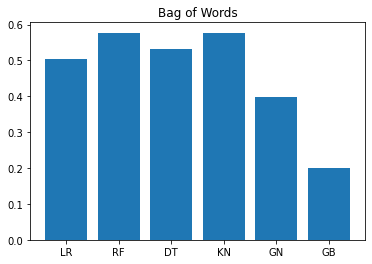

In [97]:
acc_bow = plt.bar(compare_models_bow['model'],compare_models_bow['recall'])
plt.title('Bag of Words')
plt.show()

In [98]:
data_tf = {'model':model,'accuracy':accuracy['TF-IDF'],'recall':recall['TF-IDF']}
compare_models_tf = pd.DataFrame(data_tf)
compare_models_tf

,model,accuracy,recall
0,LR,0.895695,0.517413
1,RF,0.990066,0.487562
2,DT,0.990066,0.452736
3,KN,0.990066,0.477612
4,GN,0.990066,0.472637
5,GB,0.990066,0.467662


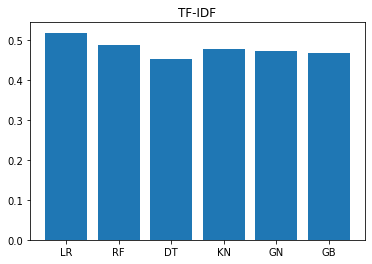

In [99]:
acc_bow = plt.bar(compare_models_tf['model'],compare_models_tf['recall'])
plt.title('TF-IDF')
plt.show()

Keeping both recall value and accuracy in mind our best model is Random Forest with bag of words input 

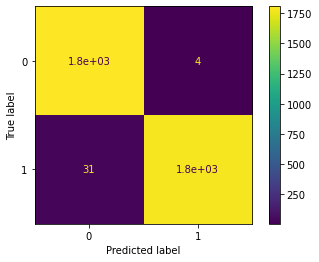

In [219]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_RF_bow,bow_train,y_train)

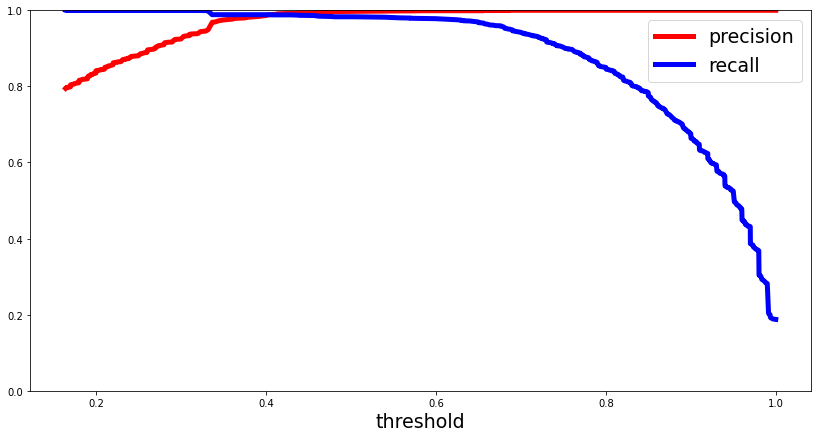

In [111]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = model_RF_bow.predict_proba(bow_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)

In [117]:
from sklearn.metrics import roc_curve


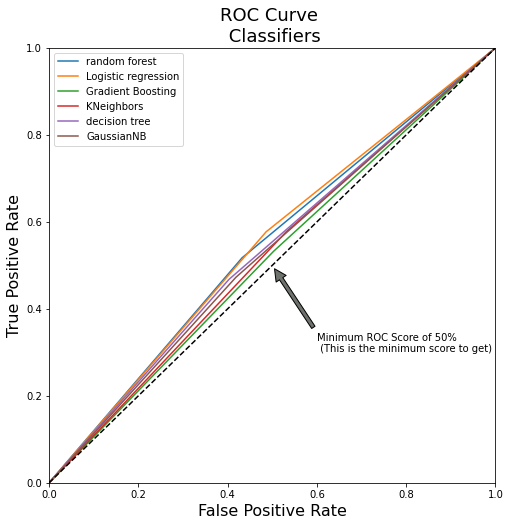

In [123]:
LR_fpr, LR_tpr, threshold = roc_curve(y_test,y_predict_LR_tf)
RF_fpr, RF_tpr, threshold = roc_curve(y_test, y_predict_RF_bow)
DT_fpr, DT_tpr, thresold = roc_curve(y_test, y_predict_DT_bow)
KN_fpr, KN_tpr, thresold = roc_curve(y_test, y_predict_KN_bow)
GB_fpr, GB_tpr, threshold = roc_curve(y_test, y_predict_GB_tf)
GN_fpr, GN_tpr, threshold = roc_curve(y_test, y_predict_GN_tf)


def graph_roc_curve_multiple(LR_fpr, LR_tpr, RF_fpr, RF_tpr, DT_fpr, DT_tpr, KN_fpr, KN_tpr, GB_fpr, GB_tpr, GN_fpr, GN_tpr,):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(RF_fpr, RF_tpr, label='random forest')
    plt.plot(LR_fpr, LR_tpr, label='Logistic regression')
    plt.plot(GB_fpr, GB_tpr, label='Gradient Boosting')
    plt.plot(KN_fpr, KN_tpr, label='KNeighbors')
    plt.plot(DT_fpr, DT_tpr, label='decision tree')
    plt.plot(GN_fpr, GN_tpr, label='GaussianNB')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(RF_fpr, RF_tpr, LR_fpr, LR_tpr,GB_fpr, GB_tpr, KN_fpr, KN_tpr, DT_fpr, DT_tpr,GN_fpr, GN_tpr)
plt.show()

In [114]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, model_RF_bow.predict_proba(bow_test)[:,1])
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.5595243260441977
